# Sujet d'examen Mineure Informatique pour la finance

### Préambule:
1) Travaux d'analyses à rendre sur un Jupyter NoteBook dédié, seul ou par binôme (pas de majoration pour les étudiants seuls, le "bonus" étant attribué à ceux qui font l'effort de bien vouloir travailler en équipe)

2) Date limite de dépôt lundi 13 décembre 23h59 par email à pierre.weirich@ext.esiea.fr

3) 1pt bonus sera attribué pour chaque ligne de commentaires expliquant clairement ce que le code fait. (Point annulé si le commentaire se retrouve sur une autre copie...)

4) Merci de bien faire attention à la qualité des données manipulée et le sens des manipulations réaliser.

---
### Sujet:

#### Étape 1 : (100pts)
1) (25pts) Sur 25 actions sélectionnées sur la période des 10 dernières années (à partir du 1er janvier 2012), réaliser une analyse statistique complète des données (statistiques descriptives par années, indicateurs glissants, distribution, autres...).

2) (5pts) Récupérer les cours de l'indice S&P-500 (il sera votre benchmark) et réaliser les mêmes analyses.

3) (10pts) Construire le portefeuille équi-pondéré des 25 actions et réaliser les memes analyses statistiques ainsi qu'une analyse de V@R (pour 1M€ investis) aux percentiles 1%, 2%, 3%, 4% et 5% et aux horizons d'investissements 1jour, 2jours, 3jours, 4jours, 5jours (le résultat est une matrice de V@R)

4) (40pts) Calculer les pondérations optimales selon la méthode de Markovitz pour chaque année. Puis reconstruire la série temporelle résultante.
   - Que cela représente-t-il ?
   - Quels en sont les avantages/inconvénients statistiques (a comparer au portefeuille équi-pondéré et à l'indice benchmark) ?


#### Étape 2 : (100pts - étape indépendante)
Au préalable choisir une des 3 séries temporelles suivante: Le benchmark, le portefeuille équi-pondéré, la série temporelle réalisée utilisant Markovitz...

1) (30pts) Décrire, en se basant sur une analyse quantitative, quelle stratégie de hedge (aka. "couverture") utilisant des options vanilles pourrait être utilisée ?
    - A quel(s) instants?
    - Pourquoi?
    - Quels effets sont attendus?

2) (30pts) Implémenter votre stratégie, calculer son coût, calculer le gain réalisé.

3) (40pts) Construire votre portefeuille hedgé, faites une analyse statistique ainsi qu'un calcul de V@R et comparez.

---
#### Bonnes journées de travail et bonne continuation à toutes et à tous!

Cordialement, Pierre w.

# Question 1

##### (25pts) Sur 25 actions sélectionnées sur la période des 10 dernières années (à partir du 1er janvier 2012), réaliser une analyse statistique complète des données (statistiques descriptives par années, indicateurs glissants, distribution, autres...).

In [71]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from scipy import stats

In [72]:
components = "AC.PA BN.PA VIE.PA EN.PA AIR.PA RI.PA AI.PA SW.PA LR.PA VIV.PA ML.PA OR.PA GLE.PA SU.PA ORA.PA ACA.PA MC.PA ENGI.PA ATO.PA DG.PA CAP.PA HO.PA KER.PA BNP.PA WLN.PA"
data = yf.download(components, start="2012-01-01")['Close']

[*********************100%***********************]  25 of 25 completed


In [73]:
data.info

<bound method DataFrame.info of                 AC.PA     ACA.PA       AI.PA      AIR.PA     ATO.PA  \
Date                                                                  
2012-01-02  19.940001   4.268812   64.468315   24.500000  26.325296   
2012-01-03  20.059999   4.268812   64.693977   24.500000  26.941404   
2012-01-04  19.670000   4.140738   64.282471   24.565001  26.914783   
2012-01-05  18.959999   3.925035   63.154121   24.889999  26.272053   
2012-01-06  19.105000   3.976072   62.988190   24.764999  26.500240   
...               ...        ...         ...         ...        ...   
2021-12-06  27.400000  12.316000  148.759995  102.839996  37.560001   
2021-12-07  27.280001  12.466000  155.320007  105.879997  36.430000   
2021-12-08  27.420000  12.406000  155.339996  107.260002  36.160000   
2021-12-09  27.010000  12.314000  154.880005  105.500000  36.360001   
2021-12-10  27.000000  12.234000  154.520004  105.580002  36.070000   

                BN.PA     BNP.PA      CAP.PA

## A) Analyse de courbes

<AxesSubplot:xlabel='Date'>

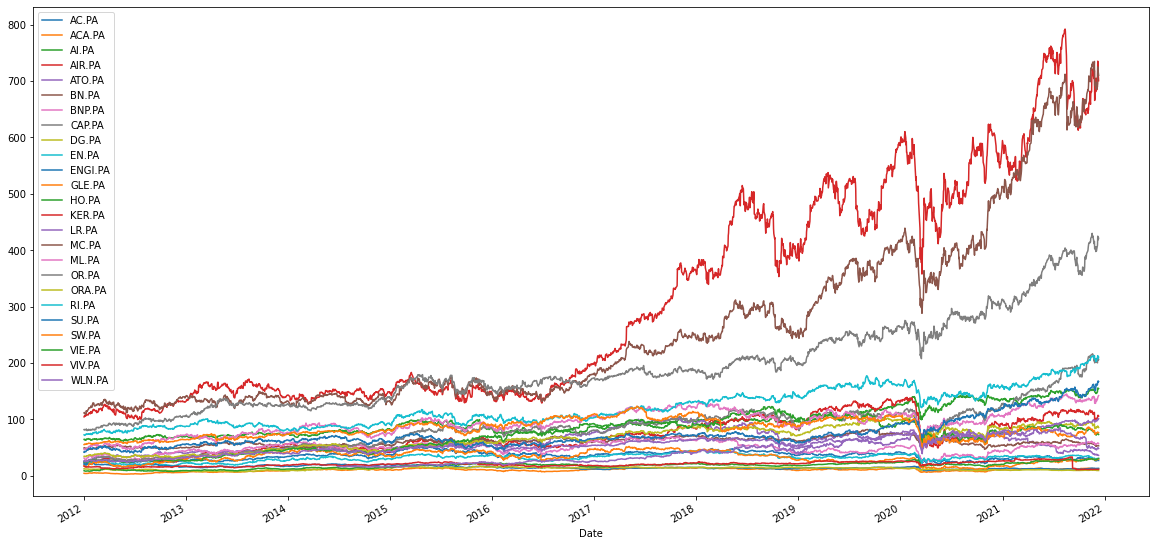

In [74]:
data.plot(figsize = (20,10))

Ci-dessus, le graphique représant l'évolution des prix des actions de notre portefeuille entre le 01 Janvier 2012 et le 11 Décembre 2021.

On peut voir que les actions Kering SA (KER.PA en rouge), LVMH (MC.PA en marron) et Capgemini SE (CAP.PA en gris) ont la plus grande marge de progression durant cette période.

Ici, on veut utiliser la normalisation pour vérifier si ces valeurs représente bien la réalité :

In [75]:
(data / data.iloc[0] * 100)

,AC.PA,ACA.PA,AI.PA,AIR.PA,ATO.PA,BN.PA,BNP.PA,CAP.PA,DG.PA,EN.PA,...,MC.PA,ML.PA,OR.PA,ORA.PA,RI.PA,SU.PA,SW.PA,VIE.PA,VIV.PA,WLN.PA
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
2012-01-03,100.601800,100.000000,100.350036,100.000000,102.340365,101.106715,100.143810,100.697903,100.885342,100.261256,...,100.718458,102.833422,100.391198,100.000000,99.434244,104.090464,100.687536,98.891998,99.400348,NaN
2012-01-04,98.645936,96.999770,99.711728,100.265308,102.239242,98.659763,97.954614,100.059818,100.290271,99.015278,...,99.595872,101.842274,99.425426,97.490899,98.827103,101.251204,101.085577,94.986011,97.058828,NaN
2012-01-05,95.085249,91.946772,97.961489,101.591834,99.797747,98.345012,92.681365,96.689931,98.867926,96.663987,...,98.742702,101.238959,99.535446,95.426956,98.702908,102.273820,99.945723,91.897035,95.288405,NaN
2012-01-06,95.812432,93.142352,97.704104,101.081630,100.664547,98.009951,90.939594,98.444661,97.924528,95.377815,...,97.799733,100.506358,99.242050,95.426956,99.254863,102.081323,100.796089,90.968102,94.517425,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-06,137.412231,288.511170,230.749003,419.755087,142.676461,107.807902,183.253431,798.404749,252.859212,122.829584,...,619.757508,292.286133,499.510991,75.022261,288.947137,388.931651,140.112180,329.490757,66.744703,NaN
2021-12-07,136.810431,292.025020,240.924564,432.163254,138.384008,107.340850,186.193661,825.922233,255.994196,123.352096,...,651.100144,298.750257,519.315369,75.087016,293.776722,402.454256,139.424637,332.624487,67.275823,NaN
2021-12-08,137.512534,290.619489,240.955570,437.795927,137.358377,107.686059,185.778202,819.940179,252.917258,122.387467,...,641.850042,301.659126,511.308049,74.633752,286.463368,400.144364,139.424637,336.989359,66.390617,NaN


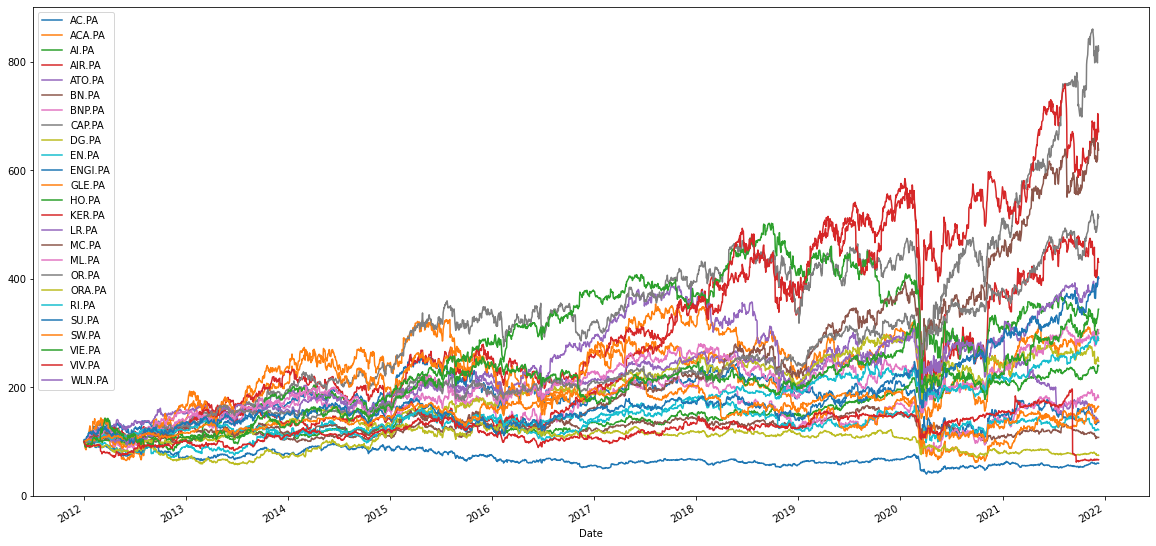

In [76]:
(data / data.iloc[0] * 100).plot(figsize = (20, 10))
plt.show()

Au final, après avoir normalisé nos données, on peut voir que sur une échelle commune la performance de Capgemini SE (en gris) est supérieure à celle de Kering SA (en rouge) et LVMH (en marron) entre 2012 et 2022.

## B) Gain journalier

Calcul des rendements journaliers :

In [77]:
gains = np.log(1 + data.pct_change())
gains.tail()

,AC.PA,ACA.PA,AI.PA,AIR.PA,ATO.PA,BN.PA,BNP.PA,CAP.PA,DG.PA,EN.PA,...,MC.PA,ML.PA,OR.PA,ORA.PA,RI.PA,SU.PA,SW.PA,VIE.PA,VIV.PA,WLN.PA
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-06,0.033776,0.006190,0.018317,0.042610,0.024253,0.003774,0.020616,-0.005976,0.020763,0.019161,...,0.007418,0.021610,0.019025,0.005409,0.022701,0.010948,0.031482,0.019551,0.005319,0.052864
2021-12-07,-0.004389,0.012106,0.043153,0.029132,-0.030547,-0.004342,0.015917,0.033885,0.012322,0.004245,...,0.049335,0.021875,0.038882,0.000863,0.016576,0.034178,-0.004919,0.009466,0.007926,0.022448
2021-12-08,0.005119,-0.004825,0.000129,0.012949,-0.007439,0.003211,-0.002234,-0.007269,-0.012092,-0.007851,...,-0.014309,0.009690,-0.015539,-0.006055,-0.025209,-0.005756,0.000000,0.013037,-0.013245,-0.016070
2021-12-09,-0.015066,-0.007443,-0.002966,-0.016545,0.005516,-0.000566,-0.012289,0.012086,-0.009687,-0.005599,...,0.000420,0.009950,0.002030,-0.005546,0.012446,0.009099,-0.006510,0.021358,0.003549,0.004603
2021-12-10,-0.000370,-0.006518,-0.002327,0.000758,-0.008008,0.000377,-0.012442,-0.010143,-0.009899,-0.000661,...,-0.007018,0.003882,0.004642,0.005980,0.000951,-0.005377,-0.002616,-0.000650,-0.003549,-0.017711


Calcul de la moyenne des rendements journaliers :

In [78]:
daily_mean_gains = gains.mean()
daily_mean_gains

AC.PA      0.000119
ACA.PA     0.000414
AI.PA      0.000344
AIR.PA     0.000575
ATO.PA     0.000124
BN.PA      0.000029
BNP.PA     0.000234
CAP.PA     0.000828
DG.PA      0.000357
EN.PA      0.000077
ENGI.PA   -0.000201
GLE.PA     0.000196
HO.PA      0.000431
KER.PA     0.000749
LR.PA      0.000546
MC.PA      0.000729
ML.PA      0.000440
OR.PA      0.000645
ORA.PA    -0.000115
RI.PA      0.000419
SU.PA      0.000547
SW.PA      0.000127
VIE.PA     0.000486
VIV.PA    -0.000161
WLN.PA     0.000564
dtype: float64

Calcul de la moyenne des rendements journaliers sur une année :

In [79]:
annual_mean_gains = gains.mean() * 252
annual_mean_gains

AC.PA      0.030049
ACA.PA     0.104377
AI.PA      0.086658
AIR.PA     0.144815
ATO.PA     0.031221
BN.PA      0.007322
BNP.PA     0.058951
CAP.PA     0.208778
DG.PA      0.090044
EN.PA      0.019407
ENGI.PA   -0.050701
GLE.PA     0.049320
HO.PA      0.108694
KER.PA     0.188775
LR.PA      0.137685
MC.PA      0.183655
ML.PA      0.110828
OR.PA      0.162429
ORA.PA    -0.028962
RI.PA      0.105661
SU.PA      0.137834
SW.PA      0.032043
VIE.PA     0.122490
VIV.PA    -0.040607
WLN.PA     0.142121
dtype: float64

Ci-dessus, le tableau qui nous donne les retours sur investissements moyens annuels de chaque société.

Ici, on peut voir que Capgemini SE (CAP.PA) a un ROI annuel de 20% (= Return On Investment). Capgemini a donc le meilleur ROI de notre portefeuille comme nous l'avait indiqué le graphique lors de la normalisation des données précédente. Si nous nous étions seulement basés sur l'analyse de la première courbe (sans la normalisation), notre analyse aurait été faussée.

# Question 2

##### (5pts) Récupérer les cours de l'indice S&P-500 (il sera votre benchmark) et réaliser les mêmes analyses.

In [80]:
yf.pdr_override()

sp500 = pdr.get_data_yahoo("^GSPC", start="2012-01-01")['Close']

[*********************100%***********************]  1 of 1 completed


In [81]:
sp500.tail()

Date
2021-12-06    4591.669922
2021-12-07    4686.750000
2021-12-08    4701.209961
2021-12-09    4667.450195
2021-12-10    4712.020020
Name: Close, dtype: float64

## A) Analyse de courbes

<AxesSubplot:xlabel='Date'>

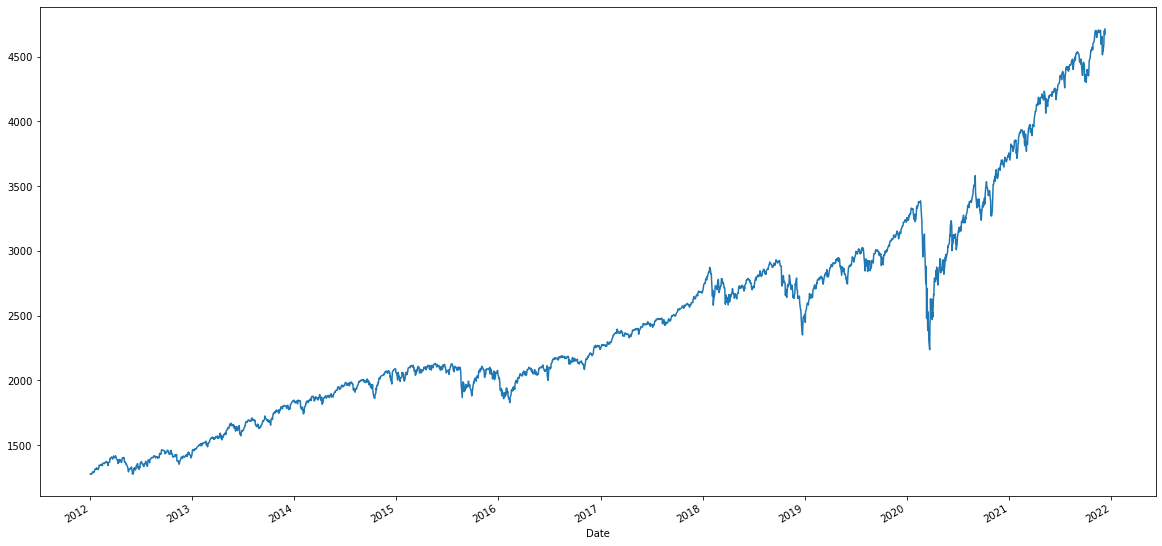

In [82]:
sp500.plot(figsize = (20,10))

In [83]:
(sp500 / sp500.iloc[0] * 100)

Date
2012-01-03    100.000000
2012-01-04    100.018792
2012-01-05    100.313219
2012-01-06    100.058729
2012-01-09    100.285021
                 ...    
2021-12-06    359.550038
2021-12-07    366.995269
2021-12-08    368.127554
2021-12-09    365.484001
2021-12-10    368.974034
Name: Close, Length: 2503, dtype: float64

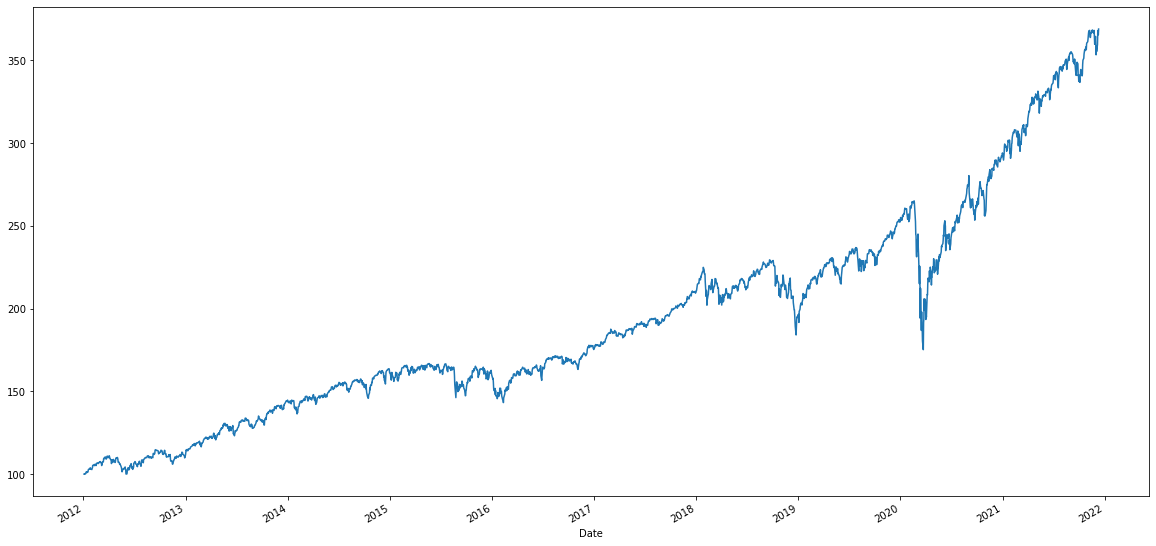

In [84]:
(sp500 / sp500.iloc[0] * 100).plot(figsize = (20, 10))
plt.show()

## B) Gain journalier

In [85]:
gains = np.log(1 + sp500.pct_change())
gains.tail()

Date
2021-12-06    0.011663
2021-12-07    0.020496
2021-12-08    0.003081
2021-12-09   -0.007207
2021-12-10    0.009504
Name: Close, dtype: float64

In [86]:
daily_mean_gains = gains.mean()
daily_mean_gains

0.0005218049912140968

In [87]:
annual_mean_gains = gains.mean() * 252
annual_mean_gains

0.13149485778595238

Ci-dessus, le retour sur investissements annuels à hauteur de 13% du benchmark S&P-500.

# Question 3

##### (10pts) Construire le portefeuille équi-pondéré des 25 actions et réaliser les memes analyses statistiques ainsi qu'une analyse de V@R (pour 1M€ investis) aux percentiles 1%, 2%, 3%, 4% et 5% et aux horizons d'investissements 1jour, 2jours, 3jours, 4jours, 5jours (le résultat est une matrice de V@R)

In [88]:
components = "AC.PA BN.PA VIE.PA EN.PA AIR.PA RI.PA AI.PA SW.PA LR.PA VIV.PA ML.PA OR.PA GLE.PA SU.PA ORA.PA ACA.PA MC.PA ENGI.PA ATO.PA DG.PA CAP.PA HO.PA KER.PA BNP.PA WLN.PA"
data = yf.download(components, start="2012-01-01")['Close']

[*********************100%***********************]  25 of 25 completed


In [89]:
data.info

<bound method DataFrame.info of                 AC.PA     ACA.PA       AI.PA      AIR.PA     ATO.PA  \
Date                                                                  
2012-01-02  19.940001   4.268812   64.468315   24.500000  26.325296   
2012-01-03  20.059999   4.268812   64.693977   24.500000  26.941404   
2012-01-04  19.670000   4.140738   64.282471   24.565001  26.914783   
2012-01-05  18.959999   3.925035   63.154121   24.889999  26.272053   
2012-01-06  19.105000   3.976072   62.988190   24.764999  26.500240   
...               ...        ...         ...         ...        ...   
2021-12-06  27.400000  12.316000  148.759995  102.839996  37.560001   
2021-12-07  27.280001  12.466000  155.320007  105.879997  36.430000   
2021-12-08  27.420000  12.406000  155.339996  107.260002  36.160000   
2021-12-09  27.010000  12.314000  154.880005  105.500000  36.360001   
2021-12-10  27.000000  12.234000  154.520004  105.580002  36.070000   

                BN.PA     BNP.PA      CAP.PA

Définition des pondérations :

In [90]:
weights = np.array([.10, .07, .08, .04, .12, .15, .06, .01, .14, .09, .03, .18, .05, .08, .12, .19, .24, .01, .04, .06, .05, .07, .17, .11, .10, ])


Définition d'un niveau d'investissement initial :

In [91]:
initial_investment = 1000000

Calcul des rendements journaliers :

In [92]:
gains = np.log(1 + data.pct_change())

gains.tail()

,AC.PA,ACA.PA,AI.PA,AIR.PA,ATO.PA,BN.PA,BNP.PA,CAP.PA,DG.PA,EN.PA,...,MC.PA,ML.PA,OR.PA,ORA.PA,RI.PA,SU.PA,SW.PA,VIE.PA,VIV.PA,WLN.PA
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-06,0.033776,0.006190,0.018317,0.042610,0.024253,0.003774,0.020616,-0.005976,0.020763,0.019161,...,0.007418,0.021610,0.019025,0.005409,0.022701,0.010948,0.031482,0.019551,0.005319,0.052864
2021-12-07,-0.004389,0.012106,0.043153,0.029132,-0.030547,-0.004342,0.015917,0.033885,0.012322,0.004245,...,0.049335,0.021875,0.038882,0.000863,0.016576,0.034178,-0.004919,0.009466,0.007926,0.022448
2021-12-08,0.005119,-0.004825,0.000129,0.012949,-0.007439,0.003211,-0.002234,-0.007269,-0.012092,-0.007851,...,-0.014309,0.009690,-0.015539,-0.006055,-0.025209,-0.005756,0.000000,0.013037,-0.013245,-0.016070
2021-12-09,-0.015066,-0.007443,-0.002966,-0.016545,0.005516,-0.000566,-0.012289,0.012086,-0.009687,-0.005599,...,0.000420,0.009950,0.002030,-0.005546,0.012446,0.009099,-0.006510,0.021358,0.003549,0.004603
2021-12-10,-0.000370,-0.006518,-0.002327,0.000758,-0.008008,0.000377,-0.012442,-0.010143,-0.009899,-0.000661,...,-0.007018,0.003882,0.004642,0.005980,0.000951,-0.005377,-0.002616,-0.000650,-0.003549,-0.017711


Matrice de covariance basée sur les rendements :

In [93]:
cov_matrix = gains.cov()

cov_matrix

,AC.PA,ACA.PA,AI.PA,AIR.PA,ATO.PA,BN.PA,BNP.PA,CAP.PA,DG.PA,EN.PA,...,MC.PA,ML.PA,OR.PA,ORA.PA,RI.PA,SU.PA,SW.PA,VIE.PA,VIV.PA,WLN.PA
AC.PA,0.000375,0.000240,0.000108,0.000255,0.000150,0.000088,0.000235,0.000174,0.000199,0.000190,...,0.000160,0.000160,0.000099,0.000114,0.000104,0.000172,0.000186,0.000142,0.000110,0.000141
ACA.PA,0.000240,0.000492,0.000138,0.000238,0.000166,0.000091,0.000384,0.000191,0.000223,0.000234,...,0.000174,0.000198,0.000103,0.000161,0.000089,0.000225,0.000159,0.000172,0.000154,0.000141
AI.PA,0.000108,0.000138,0.000161,0.000133,0.000094,0.000086,0.000143,0.000116,0.000128,0.000121,...,0.000130,0.000108,0.000104,0.000102,0.000080,0.000143,0.000080,0.000095,0.000095,0.000097
AIR.PA,0.000255,0.000238,0.000133,0.000494,0.000155,0.000102,0.000251,0.000189,0.000226,0.000218,...,0.000191,0.000172,0.000117,0.000112,0.000115,0.000200,0.000192,0.000150,0.000124,0.000192
ATO.PA,0.000150,0.000166,0.000094,0.000155,0.000351,0.000077,0.000156,0.000179,0.000132,0.000128,...,0.000132,0.000118,0.000086,0.000081,0.000081,0.000140,0.000113,0.000098,0.000104,0.000153
BN.PA,0.000088,0.000091,0.000086,0.000102,0.000077,0.000160,0.000102,0.000084,0.000101,0.000085,...,0.000096,0.000081,0.000100,0.000087,0.000086,0.000100,0.000074,0.000087,0.000077,0.000065
BNP.PA,0.000235,0.000384,0.000143,0.000251,0.000156,0.000102,0.000427,0.000189,0.000225,0.000227,...,0.000183,0.000191,0.000115,0.000161,0.000095,0.000223,0.000161,0.000171,0.000155,0.000138
CAP.PA,0.000174,0.000191,0.000116,0.000189,0.000179,0.000084,0.000189,0.000313,0.000158,0.000153,...,0.000150,0.000136,0.000107,0.000103,0.000096,0.000169,0.000128,0.000133,0.000114,0.000164
DG.PA,0.000199,0.000223,0.000128,0.000226,0.000132,0.000101,0.000225,0.000158,0.000284,0.000205,...,0.000158,0.000156,0.000113,0.000137,0.000100,0.000180,0.000150,0.000157,0.000115,0.000153
EN.PA,0.000190,0.000234,0.000121,0.000218,0.000128,0.000085,0.000227,0.000153,0.000205,0.000356,...,0.000141,0.000157,0.000099,0.000164,0.000084,0.000181,0.000138,0.000141,0.000128,0.000143


Rendements moyens pour chaque action :

In [94]:
average_gains = gains.mean()

Calcul des rendements moyens du portefeuille, en utilisant le produit scalaire (dot) pour normaliser les moyennes individuelles par rapport aux pondérations des investissements :

In [95]:
port_mean = average_gains.dot(weights)

Ecart-type du portefeuille :

In [96]:
standard_deviation = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

Moyenne d'investissement :

In [97]:
mean_investment = (1 + port_mean) * initial_investment

Ecart type de l'investissement :

In [98]:
standard_deviation_investment = initial_investment * standard_deviation

Intervalle de confiance (ici, 95%) :

In [99]:
confidence_interval = 0.05

Utilisation de la méthode SciPy ppf pour générer des valeurs pour la fonction de distribution cumulative inverse à une distribution normale (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) :

In [100]:
from scipy.stats import norm

cutoff1 = norm.ppf(confidence_interval, mean_investment, standard_deviation_investment)

Estimation de la V@R du portefeuille en soustrayant l'investissement initial :

In [101]:
VaR = initial_investment - cutoff1
VaR

47116.86990710185

Ci-dessus, on dit qu'avec 95% de confiance notre portefeuille avec un investissement initial de 1M (USD)  ne dépassera pas les pertes supérieures à 47 116 (USD) sur une période d'une journée.

Calcul de la V@R sur plusieurs jours :

Jour 1 : V@R à 95% de confiance : 47116.87
Jour 2 : V@R à 95% de confiance : 66633.32
Jour 3 : V@R à 95% de confiance : 81608.81
Jour 4 : V@R à 95% de confiance : 94233.74
Jour 5 : V@R à 95% de confiance : 105356.52


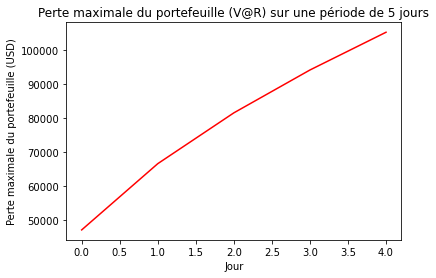

In [102]:
VaR_array = []
jours = int(5)

for x in range(1, jours+1):    
    VaR_array.append(np.round(VaR * np.sqrt(x),2))
    print("Jour " + str(x) + " : V@R à 95% de confiance : " + str(np.round(VaR * np.sqrt(x),2)))

plt.xlabel("Jour")
plt.ylabel("Perte maximale du portefeuille (USD)")
plt.title("Perte maximale du portefeuille (V@R) sur une période de 5 jours")
plt.plot(VaR_array, "r")

# Question 4

##### (40pts) Calculer les pondérations optimales selon la méthode de Markovitz pour chaque année. Puis reconstruire la série temporelle résultante.
   - Que cela représente-t-il ?
   - Quels en sont les avantages/inconvénients statistiques (à comparer au portefeuille équi-pondéré et à l'indice benchmark) ?